In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense, Dropout


In [2]:
df = pd.read_csv("aqi_data.csv")
df.head()


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [5]:
df = df.drop(columns=["City", "AQI_Bucket"])


In [6]:
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values("Date")


In [8]:
df = df.ffill()
df = df.bfill()

In [9]:
df = df.dropna()


In [11]:
X = df.drop(columns=["Date", "AQI"]).values
y = df["AQI"].values


In [12]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [13]:
TIME_STEPS = 30

def create_sequences(X, y, time_steps):
    Xs, ys = [], []
    for i in range(time_steps, len(X)):
        Xs.append(X[i-time_steps:i])
        ys.append(y[i])
    return np.array(Xs), np.array(ys)

X_seq, y_seq = create_sequences(X_scaled, y, TIME_STEPS)

X_seq.shape, y_seq.shape


((29501, 30, 12), (29501,))

In [14]:
split = int(0.8 * len(X_seq))

X_train, X_test = X_seq[:split], X_seq[split:]
y_train, y_test = y_seq[:split], y_seq[split:]


In [15]:
#RNN MODEL
rnn_model = Sequential([
    SimpleRNN(64, return_sequences=True, input_shape=(TIME_STEPS, X_seq.shape[2])),
    Dropout(0.2),
    SimpleRNN(32),
    Dense(1)
])

rnn_model.compile(optimizer="adam", loss="mse")

rnn_history = rnn_model.fit(
    X_train, y_train,
    epochs=15,
    batch_size=32,
    validation_data=(X_test, y_test)
)


C:\Users\dell\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/15
738/738 ━━━━━━━━━━━━━━━━━━━━ 32s 33ms/step - loss: 48643.9961 - val_loss: 18585.1270
Epoch 2/15
738/738 ━━━━━━━━━━━━━━━━━━━━ 25s 34ms/step - loss: 41771.8438 - val_loss: 14773.1006
Epoch 3/15
738/738 ━━━━━━━━━━━━━━━━━━━━ 42s 35ms/step - loss: 36354.2930 - val_loss: 12074.9307
Epoch 4/15
738/738 ━━━━━━━━━━━━━━━━━━━━ 25s 34ms/step - loss: 32106.6113 - val_loss: 10324.4443
Epoch 5/15
738/738 ━━━━━━━━━━━━━━━━━━━━ 40s 32ms/step - loss: 28858.6230 - val_loss: 9356.7646
Epoch 6/15
738/738 ━━━━━━━━━━━━━━━━━━━━ 39s 30ms/step - loss: 26462.9414 - val_loss: 9028.9844
Epoch 7/15
738/738 ━━━━━━━━━━━━━━━━━━━━ 45s 36ms/step - loss: 24789.8926 - val_loss: 9195.9814
Epoch 8/15
738/738 ━━━━━━━━━━━━━━━━━━━━ 119s 23ms/step - loss: 23728.6406 - val_loss: 9677.9639
Epoch 9/15
738/738 ━━━━━━━━━━━━━━━━━━━━ 23s 31ms/step - loss: 23135.1016 - val_loss: 10288.3848
Epoch 10/15
738/738 ━━━━━━━━━━━━━━━━━━━━ 23s 31ms/step - loss: 22855.7324 - val_loss: 10829.1201
Epoch 11/15
738/738 ━━━━━━━━━━━━━━━━━━━━ 2

In [16]:
#LSTM MODEL
lstm_model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(TIME_STEPS, X_seq.shape[2])),
    Dropout(0.2),
    LSTM(32),
    Dense(1)
])

lstm_model.compile(optimizer="adam", loss="mse")

lstm_history = lstm_model.fit(
    X_train, y_train,
    epochs=15,
    batch_size=32,
    validation_data=(X_test, y_test)
)


C:\Users\dell\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/15
738/738 ━━━━━━━━━━━━━━━━━━━━ 59s 65ms/step - loss: 48841.6094 - val_loss: 18620.6777
Epoch 2/15
738/738 ━━━━━━━━━━━━━━━━━━━━ 46s 63ms/step - loss: 41810.9648 - val_loss: 14789.8359
Epoch 3/15
738/738 ━━━━━━━━━━━━━━━━━━━━ 87s 69ms/step - loss: 36382.3086 - val_loss: 12092.1729
Epoch 4/15
738/738 ━━━━━━━━━━━━━━━━━━━━ 650s 73ms/step - loss: 32136.3691 - val_loss: 10334.9941
Epoch 5/15
738/738 ━━━━━━━━━━━━━━━━━━━━ 46s 63ms/step - loss: 28872.0293 - val_loss: 9358.9902
Epoch 6/15
738/738 ━━━━━━━━━━━━━━━━━━━━ 83s 64ms/step - loss: 26467.5449 - val_loss: 9029.1445
Epoch 7/15
738/738 ━━━━━━━━━━━━━━━━━━━━ 134s 62ms/step - loss: 24806.5117 - val_loss: 9189.0400
Epoch 8/15
738/738 ━━━━━━━━━━━━━━━━━━━━ 82s 62ms/step - loss: 23746.1094 - val_loss: 9664.2285
Epoch 9/15
738/738 ━━━━━━━━━━━━━━━━━━━━ 47s 63ms/step - loss: 23143.2129 - val_loss: 10277.0244
Epoch 10/15
738/738 ━━━━━━━━━━━━━━━━━━━━ 82s 63ms/step - loss: 22856.2070 - val_loss: 10829.0645
Epoch 11/15
738/738 ━━━━━━━━━━━━━━━━━━━━ 

In [18]:
#GRU MODEL 
gru_model = Sequential([
    GRU(64, return_sequences=True, input_shape=(TIME_STEPS, X_seq.shape[2])),
    Dropout(0.2),
    GRU(32),
    Dense(1)
])

gru_model.compile(optimizer="adam", loss="mse")

gru_history = gru_model.fit(
    X_train, y_train,
    epochs=15,
    batch_size=32,
    validation_data=(X_test, y_test)
)


C:\Users\dell\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/15
738/738 ━━━━━━━━━━━━━━━━━━━━ 66s 69ms/step - loss: 48604.5195 - val_loss: 18508.4180
Epoch 2/15
738/738 ━━━━━━━━━━━━━━━━━━━━ 80s 67ms/step - loss: 41656.9219 - val_loss: 14711.4941
Epoch 3/15
738/738 ━━━━━━━━━━━━━━━━━━━━ 91s 78ms/step - loss: 36254.7578 - val_loss: 12030.1865
Epoch 4/15
738/738 ━━━━━━━━━━━━━━━━━━━━ 48s 65ms/step - loss: 32024.9570 - val_loss: 10293.0654
Epoch 5/15
738/738 ━━━━━━━━━━━━━━━━━━━━ 49s 66ms/step - loss: 28783.1621 - val_loss: 9338.2344
Epoch 6/15
738/738 ━━━━━━━━━━━━━━━━━━━━ 72s 52ms/step - loss: 26403.2305 - val_loss: 9027.5176
Epoch 7/15
738/738 ━━━━━━━━━━━━━━━━━━━━ 48s 65ms/step - loss: 24758.0605 - val_loss: 9202.8398
Epoch 8/15
738/738 ━━━━━━━━━━━━━━━━━━━━ 82s 66ms/step - loss: 23709.5430 - val_loss: 9692.7539
Epoch 9/15
738/738 ━━━━━━━━━━━━━━━━━━━━ 82s 66ms/step - loss: 23123.1016 - val_loss: 10299.8320
Epoch 10/15
738/738 ━━━━━━━━━━━━━━━━━━━━ 81s 65ms/step - loss: 22848.3828 - val_loss: 10855.6201
Epoch 11/15
738/738 ━━━━━━━━━━━━━━━━━━━━ 83

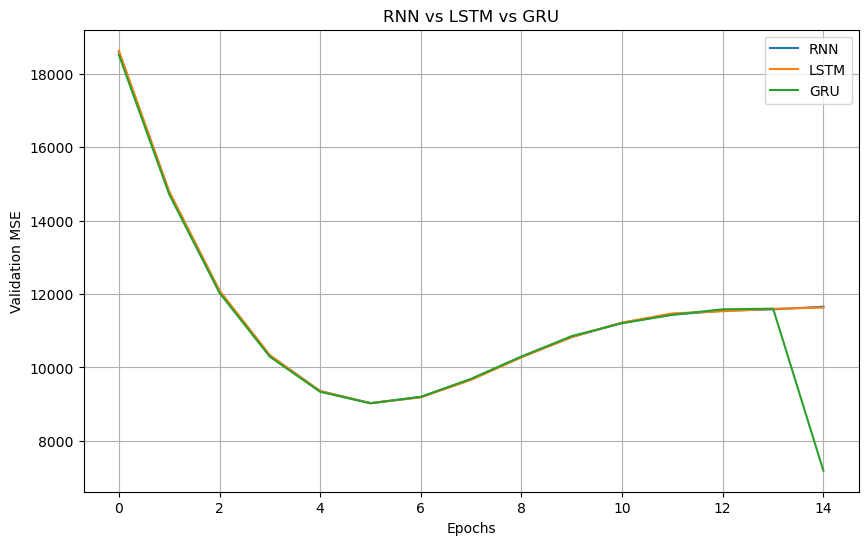

In [19]:
plt.figure(figsize=(10,6))

plt.plot(rnn_history.history['val_loss'], label='RNN')
plt.plot(lstm_history.history['val_loss'], label='LSTM')
plt.plot(gru_history.history['val_loss'], label='GRU')

plt.xlabel("Epochs")
plt.ylabel("Validation MSE")
plt.title("RNN vs LSTM vs GRU")
plt.legend()
plt.grid()
plt.show()


In [20]:
def evaluate(model):
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    return rmse, mae, r2

results = pd.DataFrame({
    "Model": ["RNN", "LSTM", "GRU"],
    "RMSE": [*evaluate(rnn_model)][0:1] + [*evaluate(lstm_model)][0:1] + [*evaluate(gru_model)][0:1]
})


185/185 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step
185/185 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step
185/185 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step


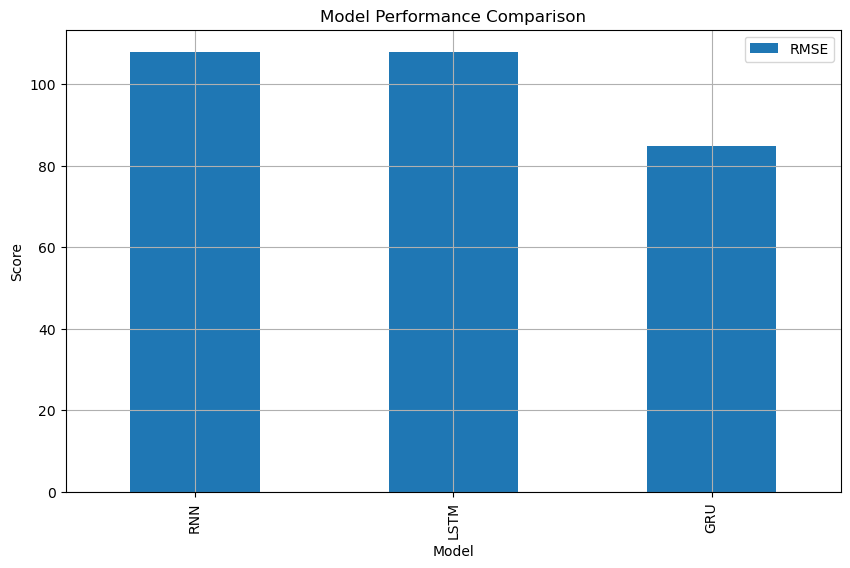

In [21]:
results.set_index("Model").plot(kind="bar", figsize=(10,6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.grid()
plt.show()


In [ ]:
## Conclusion

- RNN shows the highest error due to vanishing gradient issues.
- GRU performs better with fewer parameters.
- LSTM achieves the lowest RMSE and highest R² score.

### ✅ Best Model: LSTM
Because it captures long-term dependencies in AQI time-series data effectively.
